In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Using fine-tuned SQuAD model based on BERT for Question Answering.

In [8]:
!pip install transformers

In [9]:
import torch

In [10]:
from transformers import BertForQuestionAnswering
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad') 

In [11]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [12]:
sample_text = "Bidirectional Encoder Representations from Transformers (BERT) is a transformer-based machine learning technique for natural language processing (NLP) pre-training developed by Google. BERT was created and published in 2018 by Jacob Devlin and his colleagues from Google. As of 2019, Google has been leveraging BERT to better understand user searches. The original English-language BERT has two models:[1] (1) the BERTBASE: 12 Encoders with 12 bidirectional self-attention heads, and (2) the BERTLARGE: 24 Encoders with 16 bidirectional self-attention heads. Both models are pre-trained from unlabeled data extracted from the BooksCorpus[4] with 800M words and English Wikipedia with 2,500M words."
question = "Who developed BERT?"

In [15]:
input_ids = tokenizer.encode(question, sample_text)
print(input_ids)

[101, 2040, 2764, 14324, 1029, 102, 7226, 7442, 7542, 2389, 4372, 16044, 2099, 15066, 2013, 19081, 1006, 14324, 1007, 2003, 1037, 10938, 2121, 1011, 2241, 3698, 4083, 6028, 2005, 3019, 2653, 6364, 1006, 17953, 2361, 1007, 3653, 1011, 2731, 2764, 2011, 8224, 1012, 14324, 2001, 2580, 1998, 2405, 1999, 2760, 2011, 6213, 24389, 1998, 2010, 8628, 2013, 8224, 1012, 2004, 1997, 10476, 1010, 8224, 2038, 2042, 15929, 16594, 14324, 2000, 2488, 3305, 5310, 17193, 1012, 1996, 2434, 2394, 1011, 2653, 14324, 2038, 2048, 4275, 1024, 1031, 1015, 1033, 1006, 1015, 1007, 1996, 14324, 15058, 1024, 2260, 4372, 16044, 2869, 2007, 2260, 7226, 7442, 7542, 2389, 2969, 1011, 3086, 4641, 1010, 1998, 1006, 1016, 1007, 1996, 14324, 8017, 3351, 1024, 2484, 4372, 16044, 2869, 2007, 2385, 7226, 7442, 7542, 2389, 2969, 1011, 3086, 4641, 1012, 2119, 4275, 2024, 3653, 1011, 4738, 2013, 4895, 20470, 12260, 2094, 2951, 15901, 2013, 1996, 2808, 24586, 2271, 1031, 1018, 1033, 2007, 5385, 2213, 2616, 1998, 2394, 16948, 2007

In [17]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)
print(tokens)

['[CLS]', 'who', 'developed', 'bert', '?', '[SEP]', 'bid', '##ire', '##ction', '##al', 'en', '##code', '##r', 'representations', 'from', 'transformers', '(', 'bert', ')', 'is', 'a', 'transform', '##er', '-', 'based', 'machine', 'learning', 'technique', 'for', 'natural', 'language', 'processing', '(', 'nl', '##p', ')', 'pre', '-', 'training', 'developed', 'by', 'google', '.', 'bert', 'was', 'created', 'and', 'published', 'in', '2018', 'by', 'jacob', 'devlin', 'and', 'his', 'colleagues', 'from', 'google', '.', 'as', 'of', '2019', ',', 'google', 'has', 'been', 'lever', '##aging', 'bert', 'to', 'better', 'understand', 'user', 'searches', '.', 'the', 'original', 'english', '-', 'language', 'bert', 'has', 'two', 'models', ':', '[', '1', ']', '(', '1', ')', 'the', 'bert', '##base', ':', '12', 'en', '##code', '##rs', 'with', '12', 'bid', '##ire', '##ction', '##al', 'self', '-', 'attention', 'heads', ',', 'and', '(', '2', ')', 'the', 'bert', '##lar', '##ge', ':', '24', 'en', '##code', '##rs', '

In [18]:
sep_index = input_ids.index(tokenizer.sep_token_id)
num_seg_a = sep_index + 1
num_seg_b = len(input_ids) - num_seg_a
seg_ids = [0]*num_seg_a + [1]*num_seg_b
assert len(seg_ids) == len(input_ids)

In [29]:
start_scores, end_scores = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([seg_ids]), return_dict=False)
type(start_scores)

torch.Tensor

In [39]:
answer_start = torch.argmax(start_scores)
answer_end = torch.argmax(end_scores)
answer = ' '.join(tokens[answer_start : answer_end+1])
print("Answer: " , answer)

Answer:  google


Answered Correctly!!

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
plt.rcParams["figure.figsize"] = (16,8)

In [33]:
s_scores = start_scores.detach().numpy().flatten()
e_scores = end_scores.detach().numpy().flatten()

token_labels = []
for(i, token) in enumerate(tokens):
  token_labels.append('{:} - {:>2}'.format(token,i))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

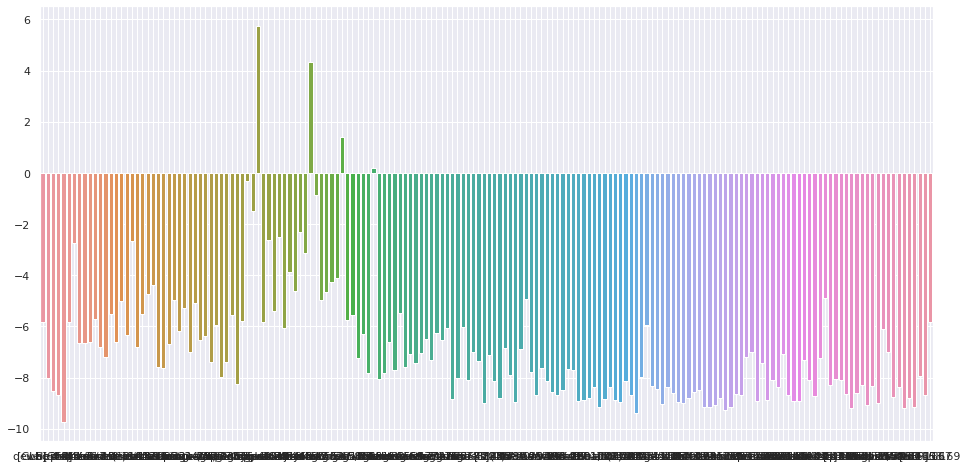

In [36]:
ax = sns.barplot(x=token_labels, y=s_scores, ci=None)
ax.grid(True)
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

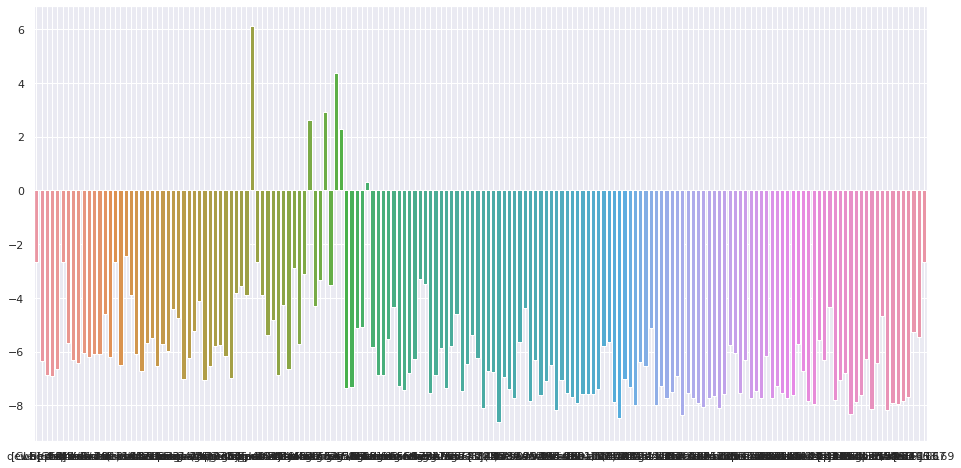

In [37]:
ax = sns.barplot(x=token_labels, y=e_scores, ci=None)
ax.grid(True)
plt